## Pipeline fMRI dataset for ML

In [1]:
# LOAD CORE LIBRARIES (FMRI + ML + DATA
# Neuro / ML / manejo de datos
import nilearn
import sklearn
import pandas as pd

# Utilidades del sistema de archivos
import os
import glob

print("Nilearn:", nilearn.__version__)
print("OK, todo cargó")

Nilearn: 0.10.4
OK, todo cargó


In [2]:
# SET DATASET ROOT DIRECTORY

base_path = "/Users/antoniaolgui/Library/Mobile Documents/com~apple~CloudDocs/Desktop/ds101_R2.0.0/"

# List folder contents (should show sub-01, sub-02, ...)
os.listdir(base_path)

#Get sorted list of all subject in the dataset
subjects = sorted([d for d in os.listdir(base_path) if d.startswith("sub-")])
subjects

['sub-01',
 'sub-02',
 'sub-03',
 'sub-04',
 'sub-05',
 'sub-06',
 'sub-07',
 'sub-08',
 'sub-09',
 'sub-10',
 'sub-11',
 'sub-12',
 'sub-13',
 'sub-14',
 'sub-15',
 'sub-16',
 'sub-17',
 'sub-18',
 'sub-19',
 'sub-20',
 'sub-21']

In [3]:
# CHECK UNIQUE trial_type VALUES ACROSS ALL EVENT FILES
#    (This reveals how congruency and correctness are encoded)

pattern = os.path.join(base_path, "sub-*", "func", "*_events.tsv")
files = sorted(glob.glob(pattern))

trial_types = set()

for f in files:
    df_tmp = pd.read_csv(f, sep="\t")
    trial_types.update(df_tmp["trial_type"].unique())

trial_types

{'congruent_correct',
 'congruent_incorrect',
 'incongruent_correct',
 'incongruent_incorrect'}

In [4]:
# BUILD MASTER BEHAVIORAL DATAFRAME
#    - Reads all *_events.tsv files from all subjects
#    - Extracts congruency (congruent / incongruent)
#    - Extracts accuracy (correct / incorrect)
#    - Creates binary ML label (0 = congruent, 1 = incongruent)

pattern = os.path.join(base_path, "sub-*", "func", "*_events.tsv")
files = sorted(glob.glob(pattern))

print("Number of event files found:", len(files))

all_rows = []

for f in files:
    df = pd.read_csv(f, sep="\t")
    
    # Extract subject ID and run filename
    subject = f.split("/")[-3]
    run = f.split("/")[-1]
    
    df["subject"] = subject
    df["run"] = run
    
    # Add continuous trial number within each run
    df["trial"] = range(1, len(df) + 1)
    
    # trial_type format: "congruent_correct", "incongruent_incorrect"
    df["congruency"] = df["trial_type"].str.split("_").str[0]
    df["accuracy_label"] = df["trial_type"].str.split("_").str[1]

    # Binary label for ML
    df["label"] = df["congruency"].map({"congruent": 0, "incongruent": 1})

    # Keep only relevant columns
    df_clean = df[[
        "subject",
        "run",
        "trial",
        "trial_type",
        "congruency",
        "accuracy_label",
        "correctness",
        "StimVar",
        "behav_unlabeled",
        "Rsponse",
        "Stimulus",
        "cond",
        "label"
    ]]
    
    all_rows.append(df_clean)

behaviour = pd.concat(all_rows, ignore_index=True)

behaviour.head(20)

Number of event files found: 42


,subject,run,trial,trial_type,congruency,accuracy_label,correctness,StimVar,behav_unlabeled,Rsponse,Stimulus,cond,label
0,sub-01,sub-01_task-simon_run-1_events.tsv,1,congruent_incorrect,congruent,incorrect,incorrect,incongruent,0,2,692,cond002,0
1,sub-01,sub-01_task-simon_run-1_events.tsv,2,incongruent_incorrect,incongruent,incorrect,incorrect,incongruent,0,2,692,cond004,1
2,sub-01,sub-01_task-simon_run-1_events.tsv,3,incongruent_correct,incongruent,correct,correct,incongruent,1,2,624,cond003,1
3,sub-01,sub-01_task-simon_run-1_events.tsv,4,congruent_correct,congruent,correct,correct,congruent,1,1,1477,cond001,0
4,sub-01,sub-01_task-simon_run-1_events.tsv,5,congruent_correct,congruent,correct,correct,congruent,1,1,578,cond001,0
5,sub-01,sub-01_task-simon_run-1_events.tsv,6,incongruent_correct,incongruent,correct,correct,incongruent,1,2,510,cond003,1
6,sub-01,sub-01_task-simon_run-1_events.tsv,7,incongruent_correct,incongruent,correct,correct,incongruent,1,2,468,cond003,1
7,sub-01,sub-01_task-simon_run-1_events.tsv,8,incongruent_correct,incongruent,correct,correct,incongruent,1,2,609,cond003,1
8,sub-01,sub-01_task-simon_run-1_events.tsv,9,incongruent_correct,incongruent,correct,correct,incongruent,1,2,462,cond003,1
9,sub-01,sub-01_task-simon_run-1_events.tsv,10,congruent_correct,congruent,correct,correct,congruent,1,1,518,cond001,0


In [5]:
# SAVE CLEAN DATASET + BASIC DESCRIPTIVE STATS

behaviour.to_csv("simon_behaviour_clean.csv", index=False)

print("DataFrame shape:", behaviour.shape)

print("\nTrials per congruency:")
print(behaviour["congruency"].value_counts())

print("\nTrials per subject:")
print(behaviour["subject"].value_counts())

DataFrame shape: (4067, 13)

Trials per congruency:
congruency
congruent      2041
incongruent    2026
Name: count, dtype: int64

Trials per subject:
subject
sub-17    195
sub-16    195
sub-14    195
sub-12    195
sub-01    194
sub-09    194
sub-15    194
sub-13    194
sub-21    194
sub-08    194
sub-07    194
sub-06    194
sub-05    194
sub-03    194
sub-04    193
sub-18    193
sub-11    193
sub-10    192
sub-02    192
sub-19    192
sub-20    192
Name: count, dtype: int64


### Summarized tables

In [6]:
#Count of trials per subject

behaviour[behaviour["subject"] == "sub-01"]

,subject,run,trial,trial_type,congruency,accuracy_label,correctness,StimVar,behav_unlabeled,Rsponse,Stimulus,cond,label
0,sub-01,sub-01_task-simon_run-1_events.tsv,1,congruent_incorrect,congruent,incorrect,incorrect,incongruent,0,2,692,cond002,0
1,sub-01,sub-01_task-simon_run-1_events.tsv,2,incongruent_incorrect,incongruent,incorrect,incorrect,incongruent,0,2,692,cond004,1
2,sub-01,sub-01_task-simon_run-1_events.tsv,3,incongruent_correct,incongruent,correct,correct,incongruent,1,2,624,cond003,1
3,sub-01,sub-01_task-simon_run-1_events.tsv,4,congruent_correct,congruent,correct,correct,congruent,1,1,1477,cond001,0
4,sub-01,sub-01_task-simon_run-1_events.tsv,5,congruent_correct,congruent,correct,correct,congruent,1,1,578,cond001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,sub-01,sub-01_task-simon_run-2_events.tsv,93,incongruent_correct,incongruent,correct,correct,incongruent,1,2,479,cond003,1
190,sub-01,sub-01_task-simon_run-2_events.tsv,94,congruent_correct,congruent,correct,correct,congruent,1,1,557,cond001,0
191,sub-01,sub-01_task-simon_run-2_events.tsv,95,incongruent_correct,incongruent,correct,correct,incongruent,1,2,535,cond003,1
192,sub-01,sub-01_task-simon_run-2_events.tsv,96,incongruent_correct,incongruent,correct,correct,incongruent,1,2,485,cond003,1


In [7]:
#Per-subject summary including congruency distribution

behaviour.groupby("subject").agg({
    "trial": "count",
    "congruency": lambda x: x.value_counts().to_dict()
})

,trial,congruency
subject,,
sub-01,194,"{'congruent': 98, 'incongruent': 96}"
sub-02,192,"{'incongruent': 96, 'congruent': 96}"
sub-03,194,"{'incongruent': 97, 'congruent': 97}"
sub-04,193,"{'congruent': 97, 'incongruent': 96}"
sub-05,194,"{'congruent': 97, 'incongruent': 97}"
sub-06,194,"{'congruent': 98, 'incongruent': 96}"
sub-07,194,"{'incongruent': 98, 'congruent': 96}"
sub-08,194,"{'congruent': 98, 'incongruent': 96}"
sub-09,194,"{'congruent': 98, 'incongruent': 96}"


In [8]:
#tabla maestra bonita con TODOS los sujetos “ordenados”
behaviour.sort_values(["subject", "run", "trial"])

,subject,run,trial,trial_type,congruency,accuracy_label,correctness,StimVar,behav_unlabeled,Rsponse,Stimulus,cond,label
0,sub-01,sub-01_task-simon_run-1_events.tsv,1,congruent_incorrect,congruent,incorrect,incorrect,incongruent,0,2,692,cond002,0
1,sub-01,sub-01_task-simon_run-1_events.tsv,2,incongruent_incorrect,incongruent,incorrect,incorrect,incongruent,0,2,692,cond004,1
2,sub-01,sub-01_task-simon_run-1_events.tsv,3,incongruent_correct,incongruent,correct,correct,incongruent,1,2,624,cond003,1
3,sub-01,sub-01_task-simon_run-1_events.tsv,4,congruent_correct,congruent,correct,correct,congruent,1,1,1477,cond001,0
4,sub-01,sub-01_task-simon_run-1_events.tsv,5,congruent_correct,congruent,correct,correct,congruent,1,1,578,cond001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4062,sub-21,sub-21_task-simon_run-2_events.tsv,93,incongruent_correct,incongruent,correct,correct,incongruent,1,2,508,cond003,1
4063,sub-21,sub-21_task-simon_run-2_events.tsv,94,congruent_correct,congruent,correct,correct,congruent,1,1,467,cond001,0
4064,sub-21,sub-21_task-simon_run-2_events.tsv,95,incongruent_correct,incongruent,correct,correct,incongruent,1,2,465,cond003,1
4065,sub-21,sub-21_task-simon_run-2_events.tsv,96,incongruent_correct,incongruent,correct,correct,incongruent,1,2,561,cond003,1


# Machine Learning Pipeline - SciKit Learn

In [32]:
## SKLEARN CON 80-20
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Features y label (igual que antes)
X = behaviour[["correctness", "Rsponse", "Stimulus", "cond", "StimVar", "accuracy_label"]]
y = behaviour["label"]  # 0 = congruent, 1 = incongruent

# Grupos = sujeto
groups = behaviour["subject"]

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [34]:
import numpy as np

# Todas las features son categóricas en este caso
categorical_features = X.columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=1000))
])

# ==== GroupShuffleSplit: splits por sujeto ====
gss = GroupShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

accuracies = []

split_id = 1
for train_idx, test_idx in gss.split(X, y, groups):

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"Split {split_id} - Accuracy: {acc:.3f}")
    split_id += 1

print("\nMean accuracy across splits:", np.mean(accuracies))

Split 1 - Accuracy: 0.999
Split 2 - Accuracy: 0.993
Split 3 - Accuracy: 1.000
Split 4 - Accuracy: 0.999
Split 5 - Accuracy: 1.000

Mean accuracy across splits: 0.9981451775165722


In [10]:
## SKLEARN CON LOS 21 SUJETOS NO MÁS, BASICAMENTE PERFECTO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Copy of the dataframe for ML
df_ml = behaviour.copy()

# Features and label
X = df_ml[["correctness", "Rsponse", "Stimulus", "cond", "StimVar", "accuracy_label"]]
y = df_ml["label"]   # 0 = congruent, 1 = incongruent

# Treat ALL features as categorical
categorical_features = X.columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

# Logistic Regression model
clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=1000))
])

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Fit model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9987714987714987

Confusion Matrix:
 [[409   0]
 [  1 404]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       1.00      1.00      1.00       405

    accuracy                           1.00       814
   macro avg       1.00      1.00      1.00       814
weighted avg       1.00      1.00      1.00       814



# Machine Learning Pipeline - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train/test split (ya lo debes tener hecho)
# X_train, X_test, y_train, y_test = ...

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("🔵 RANDOM FOREST RESULTS")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Visualization of brain images in fMRI

In [2]:
from nilearn import image, plotting
%matplotlib qt

In [3]:
fmri_file = f"{base_path}/sub-01/func/sub-01_task-simon_run-1_bold.nii"
img = image.load_img(fmri_file)

NameError: name 'base_path' is not defined

In [4]:
img.shape

NameError: name 'img' is not defined

In [1]:
fmri_file = f"{base_path}/sub-01/func/sub-01_task-simon_run-1_bold.nii"
img = image.load_img(fmri_file)

# 1) Promedio temporal → imagen 3D
mean_img = image.mean_img(img)

# 2) Plot bonito
plotting.plot_epi(mean_img, display_mode="ortho",
                  title="sub-01 Run 1 - Mean BOLD")
plotting.show()

NameError: name 'base_path' is not defined

/opt/anaconda3/envs/signalanalysis/lib/python3.8/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



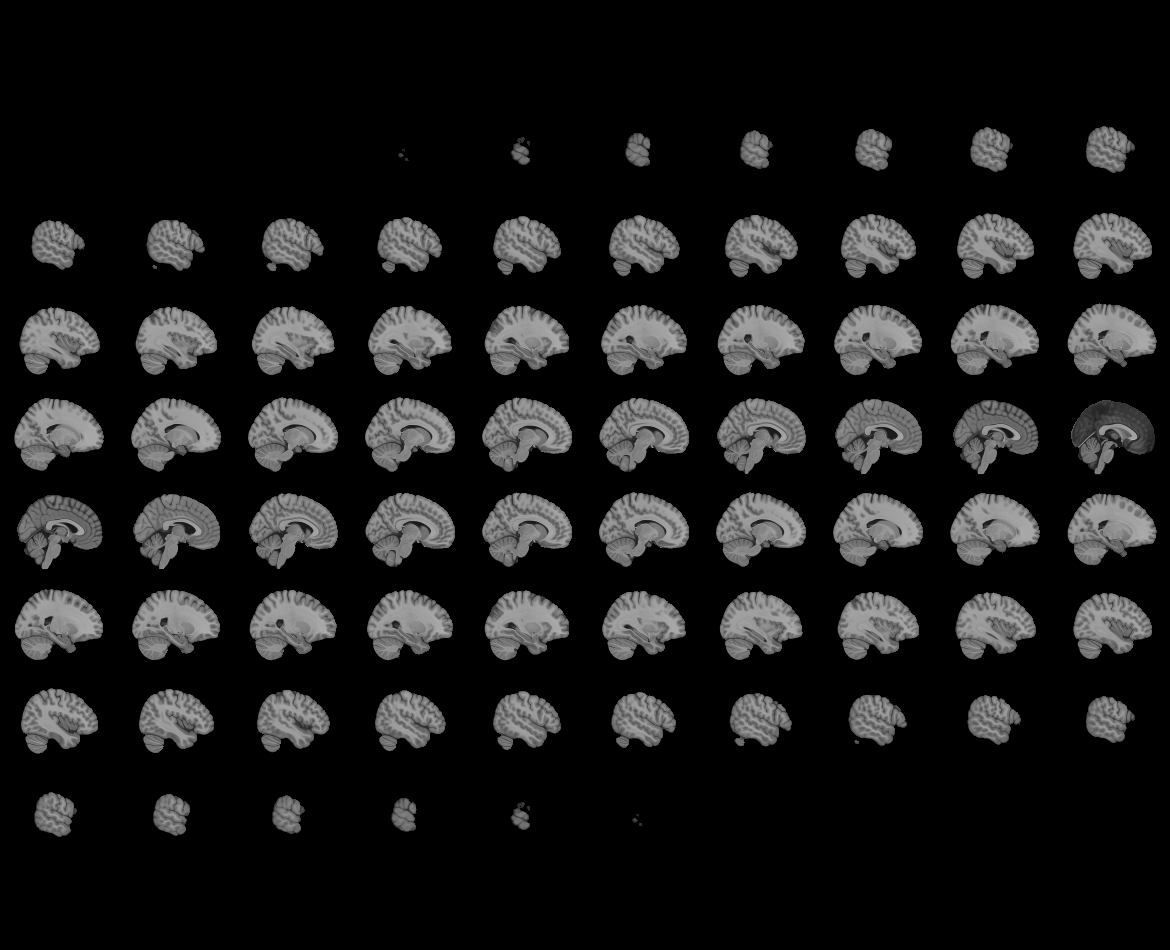
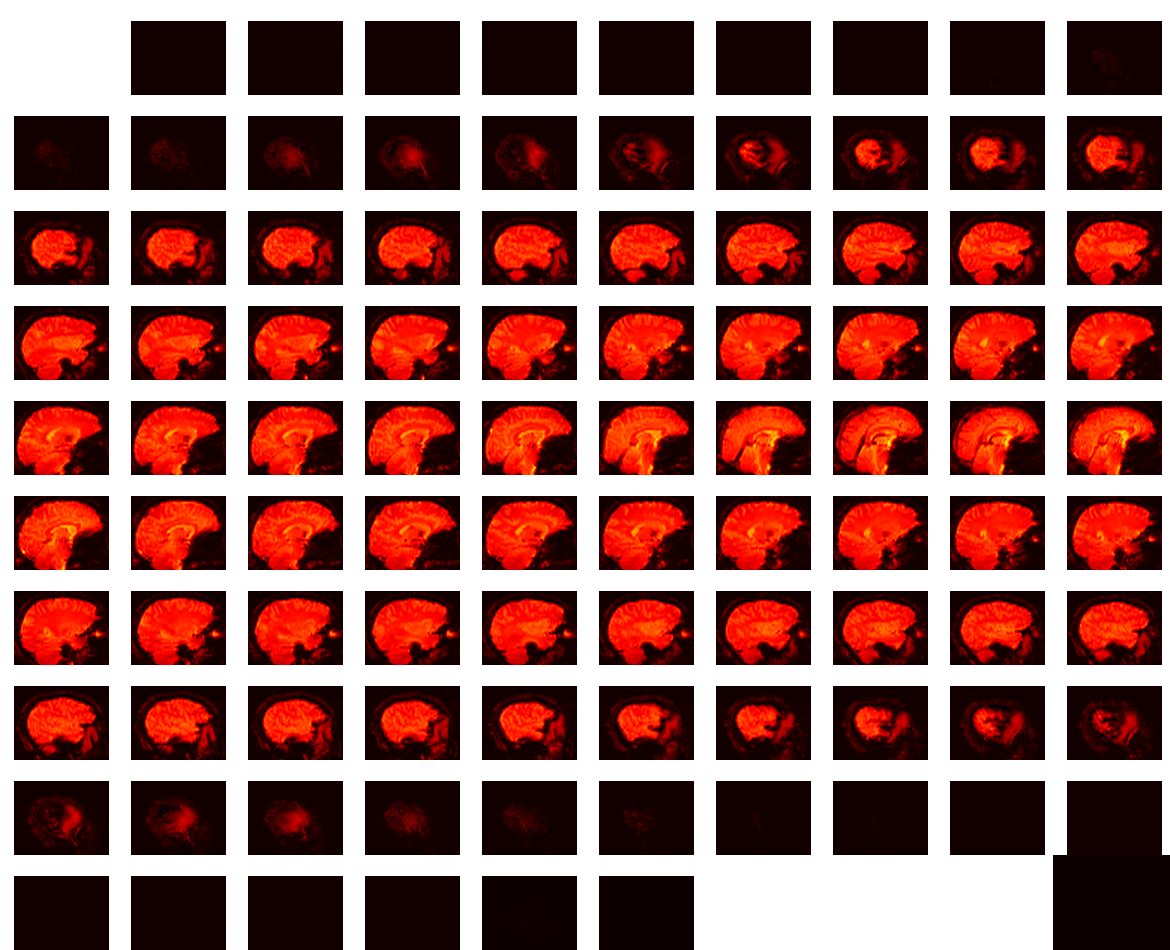

In [31]:
plotting.view_img(mean_img, threshold=None)